In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
cars = pd.read_csv(r"/Users/prathameshbodhankar/Downloads/car_data.csv")

In [3]:
cars.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [5]:
cars.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [6]:
#defining numerical and categorical columns
numeric_features = [feature for feature in cars.columns if cars[feature].dtype != 'O']
categorical_features = [feature for feature in cars.columns if cars[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [7]:
for col in categorical_features:
    print(cars[col].value_counts(normalize = True)* 100)
    print('--------')


car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
--------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini              0.11

NUMERICAL FEATURES

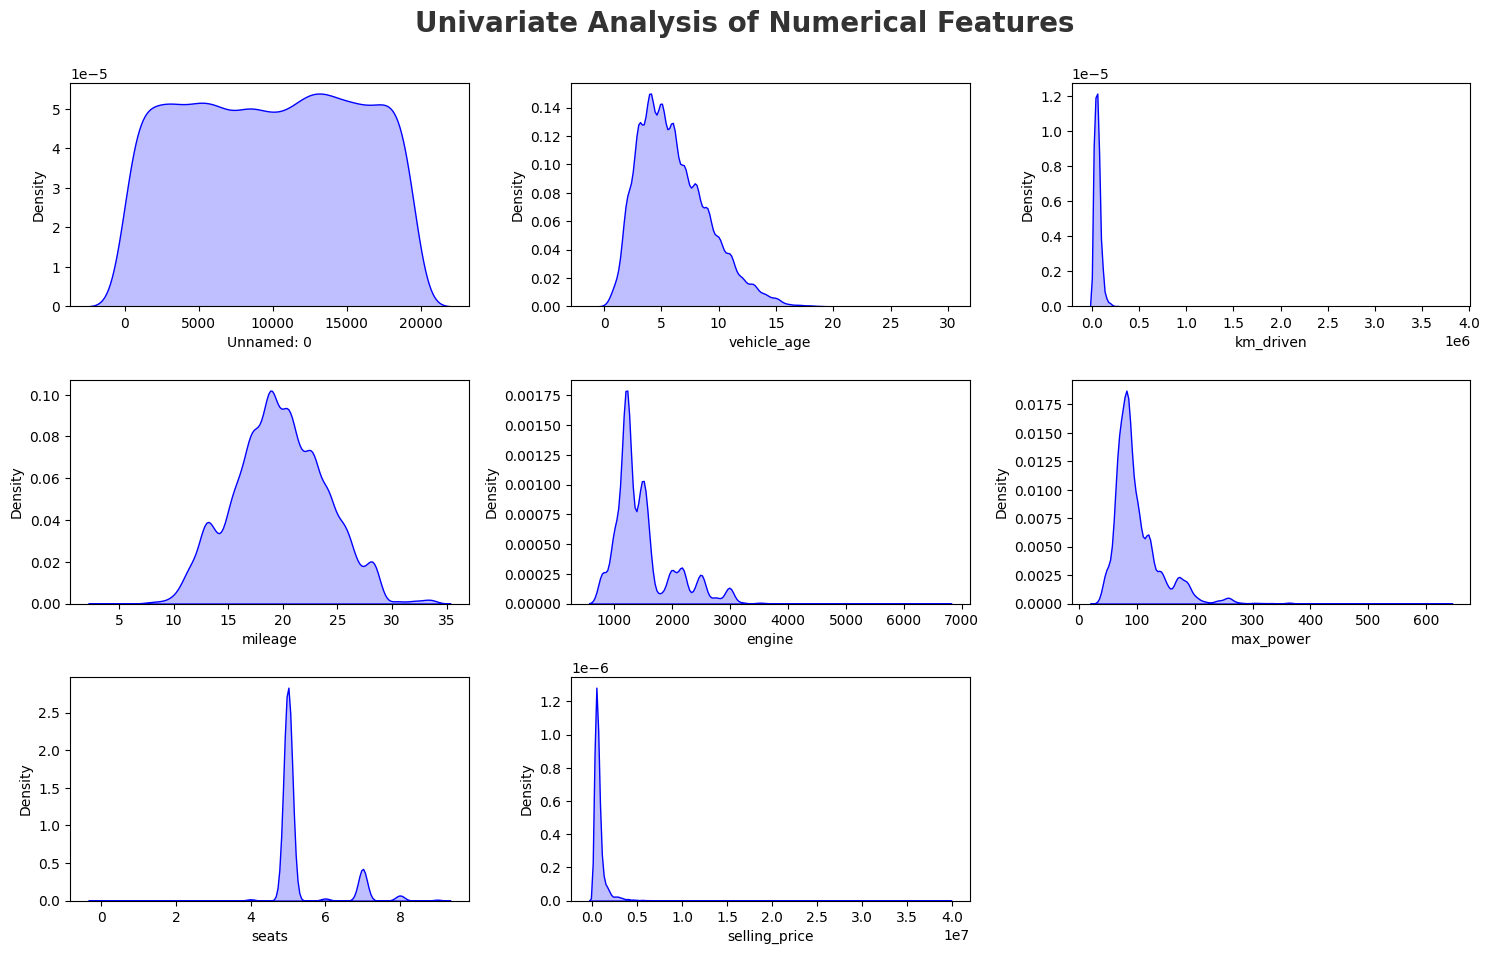

In [8]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=cars[numeric_features[i]],fill=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

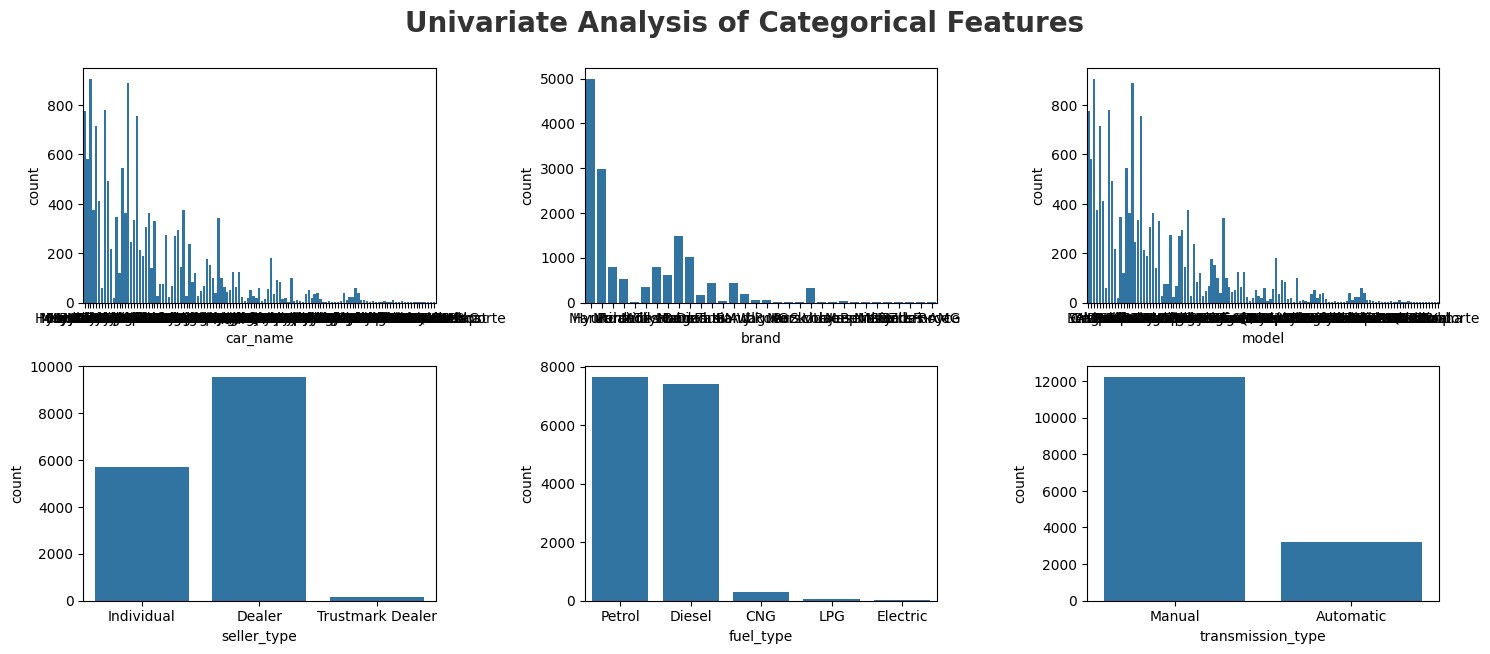

In [9]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=cars[categorical_features[i]],fill=True)
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

In [22]:
df = cars[list(cars[numeric_features])].corr()

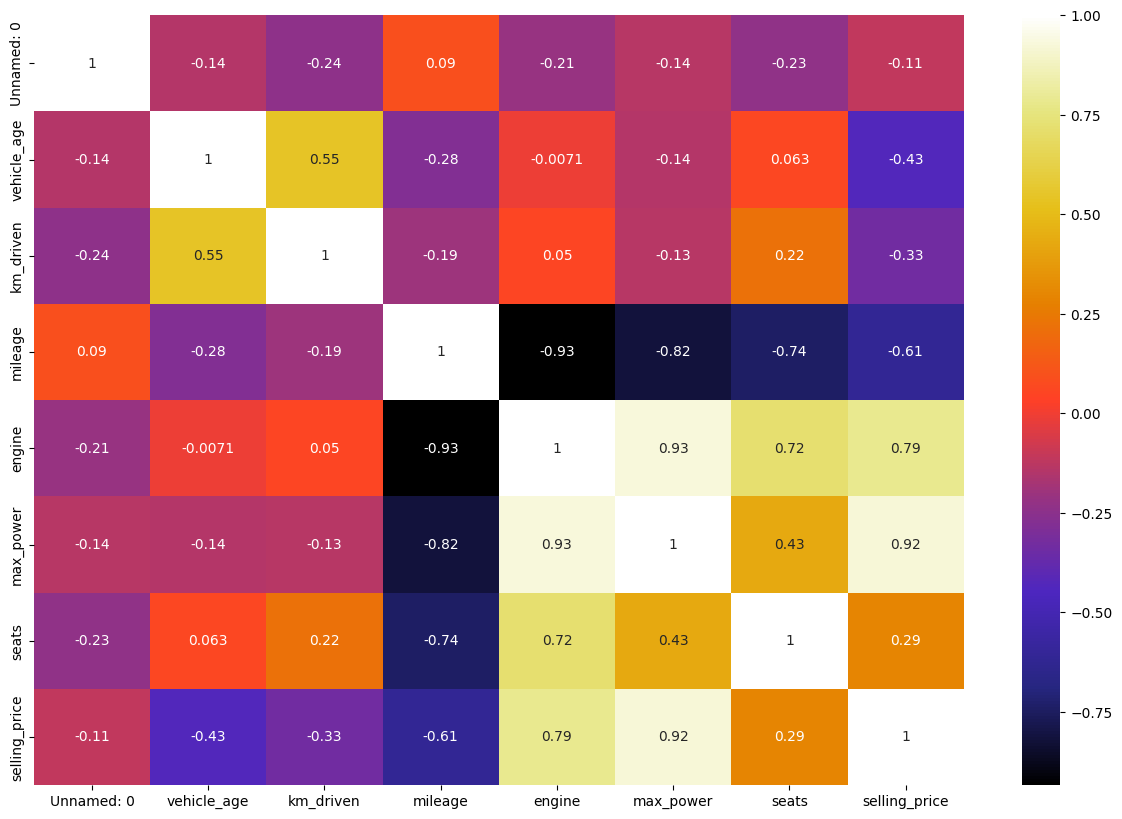

In [24]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap = 'CMRmap', annot = True)
plt.show()

Finding the 

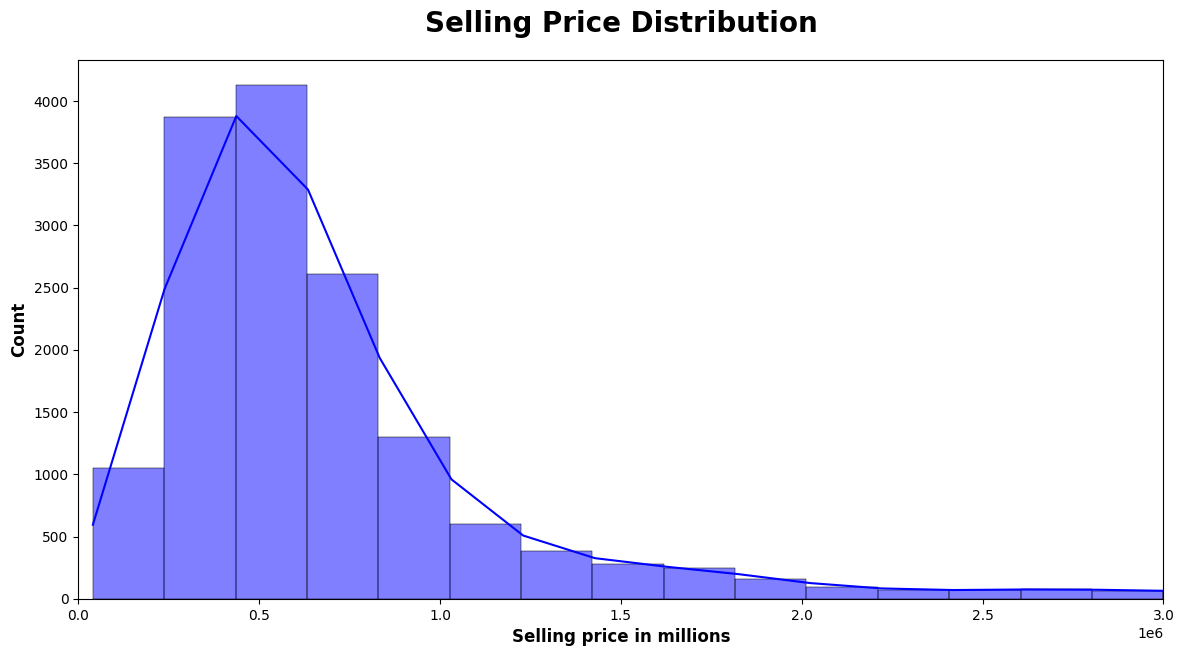

In [25]:
plt.subplots(figsize=(14,7))
sns.histplot(cars.selling_price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

/var/folders/fr/b_9srzv570zgrg708slyg6rw0000gn/T/ipykernel_4707/3447434258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="car_name", data=cars,ec = "black",palette="Set1",order = cars['car_name'].value_counts().index)


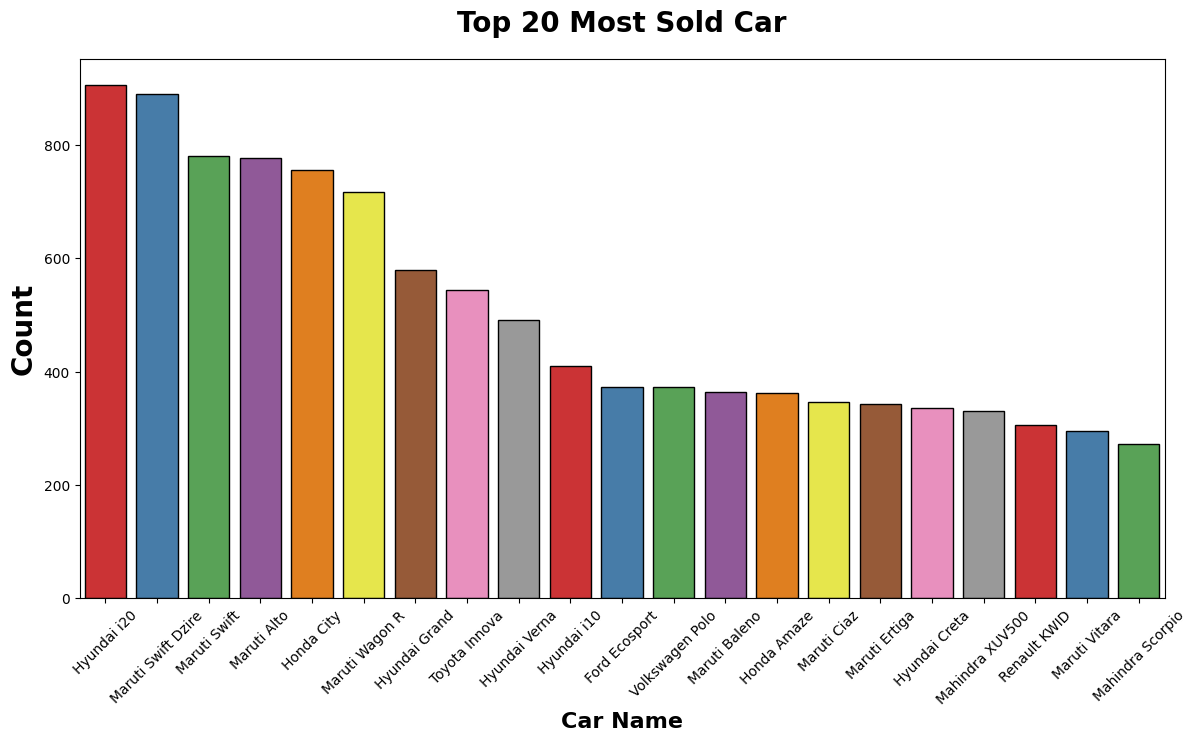

In [49]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data=cars,ec = "black",palette="Set1",order = cars['car_name'].value_counts().index)
plt.title("Top 20 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-0.5,20.5)
plt.show()

i20 is the most sold car

check mean price of Hyundai i20 which is most sold. 

/var/folders/fr/b_9srzv570zgrg708slyg6rw0000gn/T/ipykernel_4707/2486187393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="brand", data=cars,ec = "black",palette="Set1",order = cars['brand'].value_counts().index)


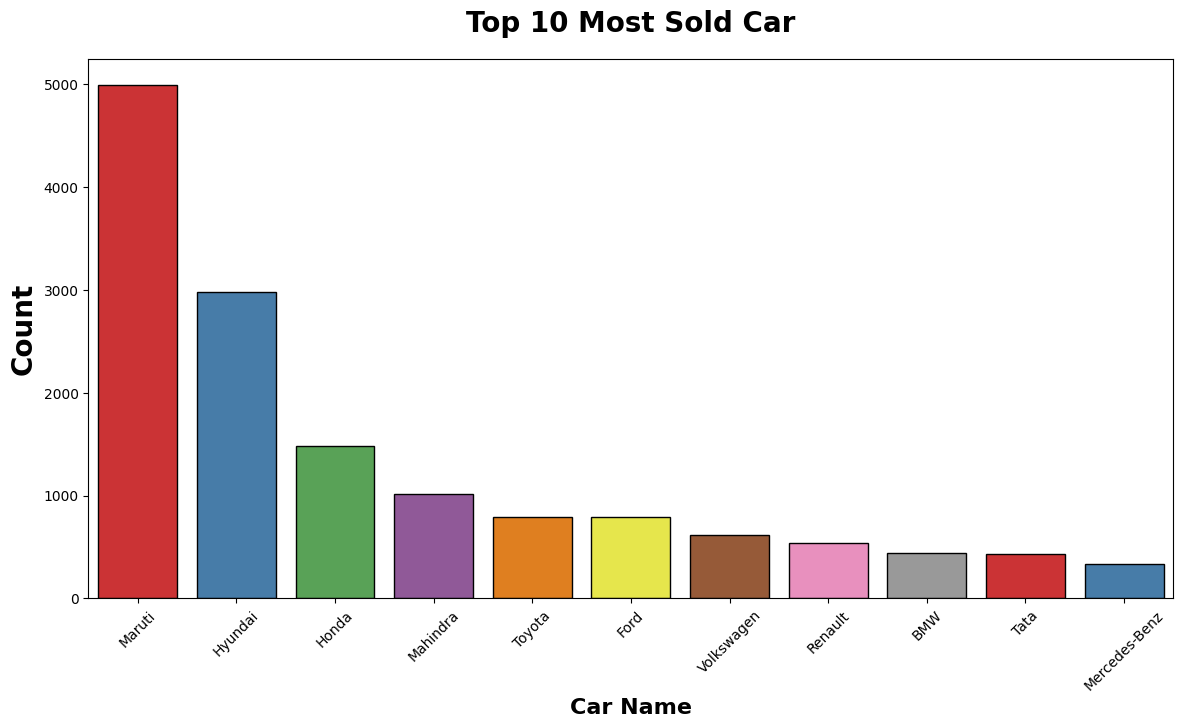

In [50]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=cars,ec = "black",palette="Set1",order = cars['brand'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-0.5,10.5)
plt.show()

Maruti is the most sold brand

check mean price of maruti brand. 

In [55]:
maruti_mean = cars[cars['brand'] == 'Maruti']['selling_price'].mean()
print(maruti_mean, 'Rupees')

487089.3179086539 Rupees


Costliest brand and costliest car for each brand. 

In [58]:
cost_brand = cars.groupby('brand').selling_price.max()
cost_brand = cost_brand.to_frame().sort_values('selling_price',ascending = False)[0:10]
cost_brand

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


Text(0.5, 1.0, 'brand vs selling price')

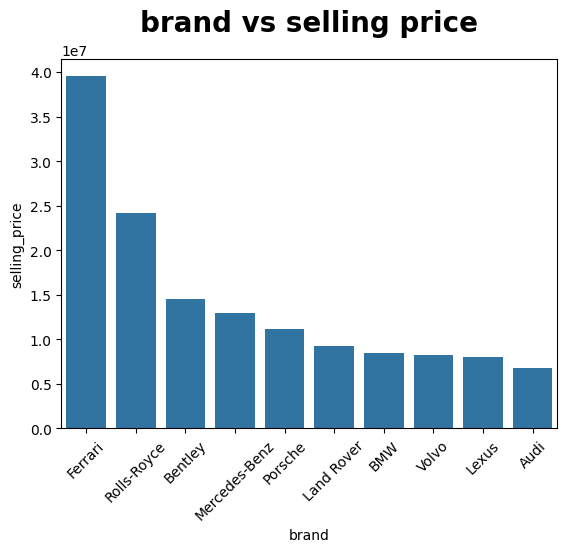

In [66]:
sns.barplot(x = 'brand', data = cost_brand, y = 'selling_price')
plt.xticks(rotation = 45)
plt.title('brand vs selling price', weight = 'bold', fontsize = 20, pad = 20)

costliest car

In [71]:
exp_car = cars.groupby('car_name').selling_price.max()
exp_car = exp_car.to_frame().sort_values('selling_price', ascending = False)[0:10]
exp_car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


Text(0.5, 1.0, 'car vs selling price')

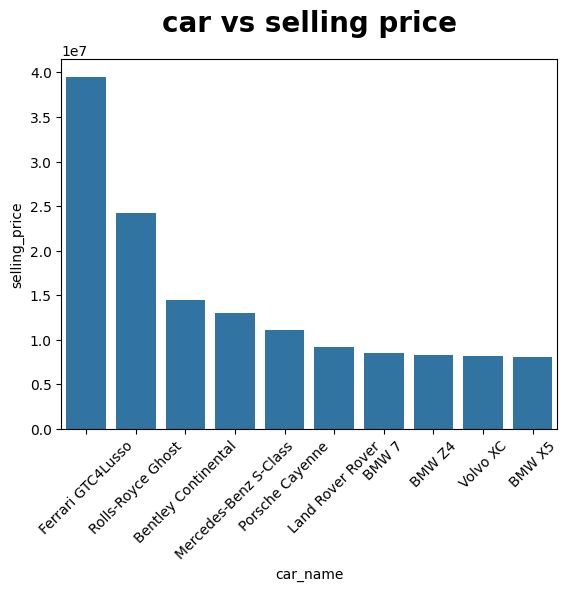

In [73]:
sns.barplot(x = 'car_name', data = exp_car, y = 'selling_price')
plt.xticks(rotation = 45)
plt.title('car vs selling price', weight = 'bold', fontsize = 20, pad = 20)

Most mileage brand and car name

In [90]:
brand_mileage = cars.groupby('brand')['mileage'].mean().sort_values(ascending = False).head(15)
brand_mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


/var/folders/fr/b_9srzv570zgrg708slyg6rw0000gn/T/ipykernel_4707/109016843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_mileage.index, y=brand_mileage.values, ec = "black", palette="Set2")


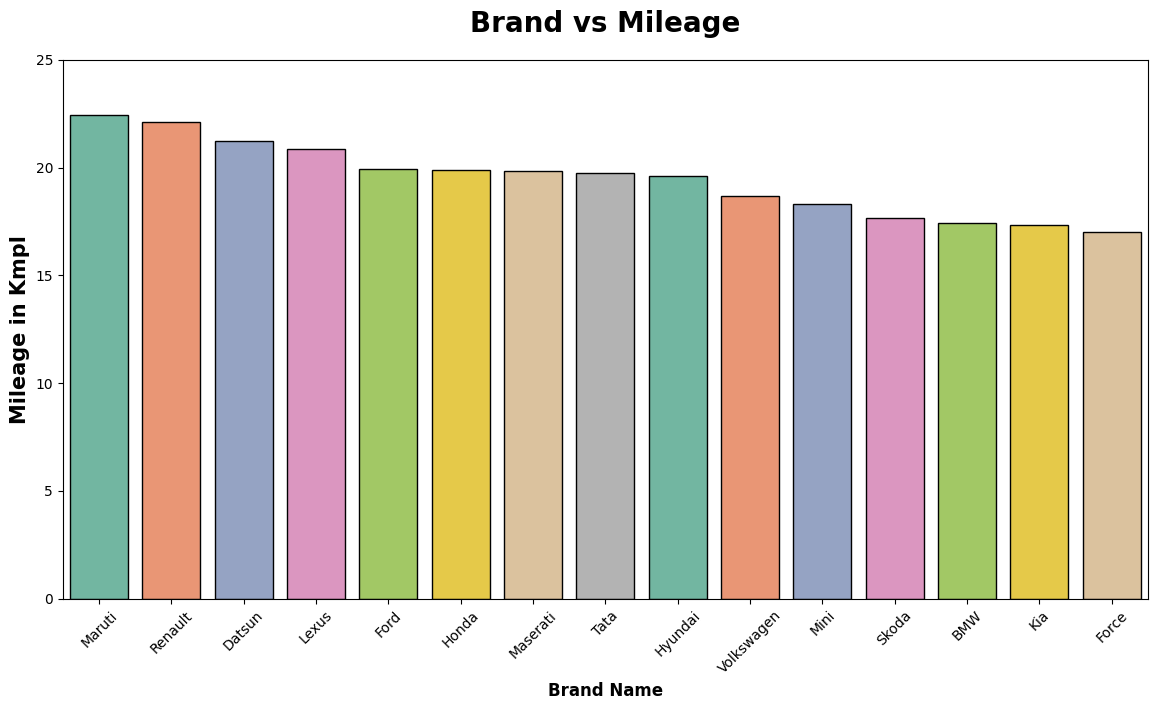

In [92]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand_mileage.index, y=brand_mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

Car with highest mileage

In [103]:
mileage = cars.groupby('car_name')['mileage'].mean().sort_values(ascending = False).head(15)
mileage.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


/var/folders/fr/b_9srzv570zgrg708slyg6rw0000gn/T/ipykernel_4707/1038993924.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= mileage.index, y= mileage.values, ec = "black", palette="Set2")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Tata Tiago'),
  Text(1, 0, 'Maruti Ciaz'),
  Text(2, 0, 'Maruti Vitara'),
  Text(3, 0, 'Renault KWID'),
  Text(4, 0, 'Maruti Celerio'),
  Text(5, 0, 'Maruti Dzire VXI'),
  Text(6, 0, 'Maruti Dzire LXI'),
  Text(7, 0, 'Maruti Dzire ZXI'),
  Text(8, 0, 'Ford Aspire'),
  Text(9, 0, 'Maruti Swift'),
  Text(10, 0, 'Maruti Alto'),
  Text(11, 0, 'Datsun RediGO'),
  Text(12, 0, 'Maruti Swift Dzire'),
  Text(13, 0, 'Maruti Baleno'),
  Text(14, 0, 'Lexus ES')])

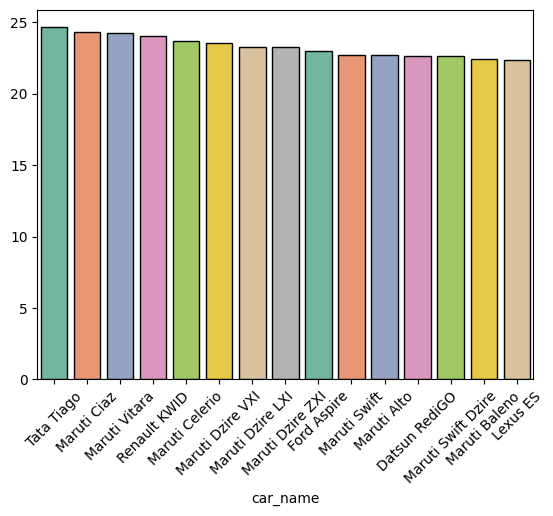

In [109]:
sns.barplot(x= mileage.index, y= mileage.values, ec = "black", palette="Set2")
plt.xticks(rotation = 45)

tata tiago has the highest mileage

Kilometer driven vs selling price

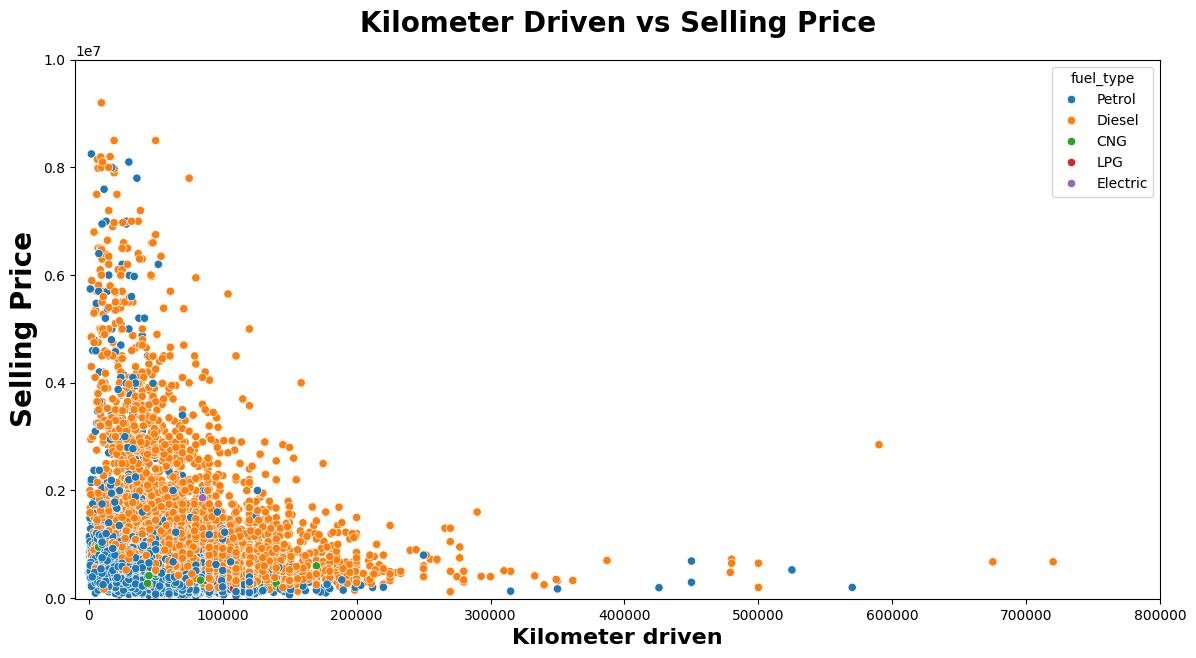

In [112]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data= cars,ec = "white",color='b', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

**Fuel type avg selling price**

In [121]:
fuel_selling = cars.groupby('fuel_type')['selling_price'].median().sort_values(ascending = False)
fuel_selling.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


/var/folders/fr/b_9srzv570zgrg708slyg6rw0000gn/T/ipykernel_4707/133859708.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = fuel_selling.index, y = fuel_selling.values,ec = "black", palette="Set2" )


<Axes: xlabel='fuel_type'>

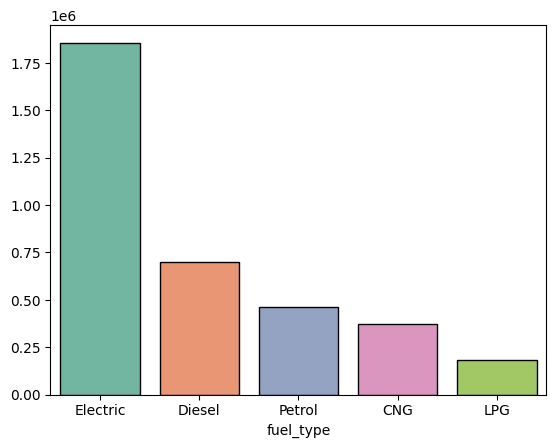

In [122]:
sns.barplot(x = fuel_selling.index, y = fuel_selling.values,ec = "black", palette="Set2" )

Most sold Fuel type

In [123]:
cars['fuel_type'].value_counts()

fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64

Fuel type and avg mileage

<Axes: xlabel='fuel_type', ylabel='mileage'>

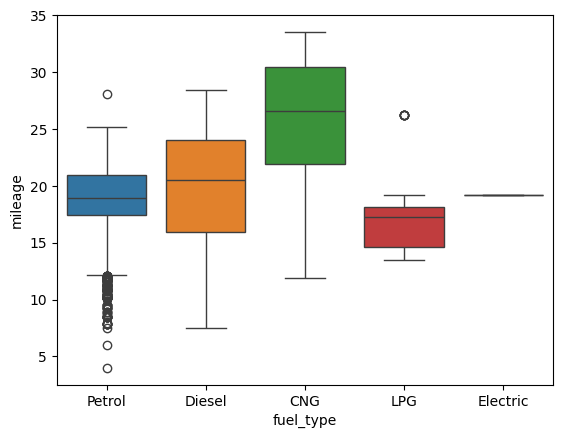

In [131]:
sns.boxplot(x = 'fuel_type', y = 'mileage', data = cars, hue = 'fuel_type')